In [2]:
import jax
from jax import lax
from jax import numpy as jnp
import numpy as np
import matplotlib.pyplot as plt

![Nonlinear Convection](Hello.png)

In [ ]:
nx=141
grid_size=2
dt=0.025
t=20 
nt=int(t/dt)
dx=grid_size/nx

In [ ]:
U_init = jnp.where(jnp.linspace(0, grid_size, nx) < 0.5, 1.0, 0.0)

In [40]:
# We define a function that will contain our simulation logic
# and decorate it with @jax.jit to compile it for high performance.
@jax.jit
def run_simulation(u_init, nt, dt, dx):
    """
    Runs the 1D nonlinear convection simulation.
    """
    def_update_space = lambda u: u - u * dt / dx * (u - jnp.roll(u, 1))

    def body_fn(carry, _):
        # The body function for lax.scan. Updates the state for one time step.
        new_carry = def_update_space(carry)
        return new_carry, new_carry

    # lax.scan runs the loop (body_fn) for nt-1 steps.
    # It is much faster than a standard Python for-loop inside a jitted function.
    final_state, all_states = lax.scan(body_fn, u_init, None, length=nt - 1)

    # We combine the initial state with all the subsequent states to get the full solution.
    return jnp.vstack([u_init, all_states])

# Run the jitted simulation
Soln = run_simulation(U_init, nt, dt, dx)

ConcretizationTypeError: Abstract tracer value encountered where concrete value is expected: traced array with shape int32[]
The `length` argument to `scan` expects a concrete `int` value. For scan-like iteration with a dynamic length, use `while_loop` or `fori_loop`.
The error occurred while tracing the function run_simulation at /tmp/ipykernel_4121/519713401.py:3 for jit. This concrete value was not available in Python because it depends on the value of the argument nt.

See https://docs.jax.dev/en/latest/errors.html#jax.errors.ConcretizationTypeError

In [38]:
Soln

Array([[1., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

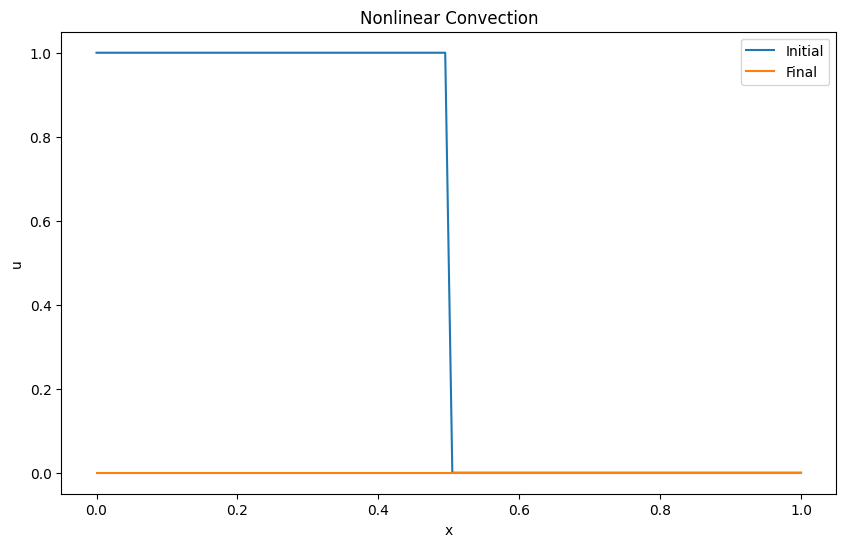

In [39]:
# Plot the initial and final solutions
x = jnp.linspace(0, grid_size, nx)
plt.figure(figsize=(10, 6))
plt.plot(x, Soln[0], label='Initial')
plt.plot(x, Soln[-1], label='Final')
plt.xlabel('x')
plt.ylabel('u')
plt.title('Nonlinear Convection')
plt.legend()
plt.show()